In [1]:
from IPython.display import display, HTML

# HTML ile resmi ortalayarak göstermek
display(HTML('<div><div style="width: 100%; display: flex; justify-content: center;"><img width="200px"  src="2.png" alt=""></div><div><ol style="width: 100%; display: flex; flex-direction: column;  align-items: center; justify-content: center;"><li style="font-size: 40px;">Aziz Amiraslanov - 210205909</li><li style="font-size: 40px;">Abbas Ugur Yazan - 210205909</li><li style="font-size: 40px;">Sadig Tanirverdiyev - 210205911</li></ol></div></div>'))


# Predict House Pricing Using Advanced Regression
Bu projede kapsamlı bir veri seti ile ev fiyatlarını tahmin eden Regresyon modeli geliştireceğiz

#### Veri seti alanları
* SalePrice: Fiyat (Hedef Alanımız)
* MSSubClass: Bina sınıfı
* MSZoning: Genel zonlama sınıflandırması
* LotFrontage: Mülke bağlı cadde uzunluğu (fit cinsinden)
* LotArea: Arsa büyüklüğü (fit kare cinsinden)
* Street: Yol erişim tipi
* Alley: Arka yol erişim tipi
* LotShape: Mülkün genel şekli
* LandContour: Arsanın düzlüğü
* Utilities: Mevcut hizmet türü
* LotConfig: Arsa konfigürasyonu
* LandSlope: Arsanın eğimi
* Neighborhood: Ames şehir sınırları içindeki fiziksel konumlar
* Condition1: Ana yol veya demiryolu yakınlığı
* Condition2: Ana yol veya demiryolu yakınlığı (varsa ikinci bir durum)
* BldgType: Konut tipi
* HouseStyle: Konut stili
* OverallQual: Genel malzeme ve bitiş kalitesi
* OverallCond: Genel durum derecelendirmesi
* YearBuilt: Orijinal inşaat tarihi
* YearRemodAdd: Yeniden yapılanma tarihi
* RoofStyle: Çatı tipi
* RoofMatl: Çatı malzemesi
* Exterior1st: Evdeki dış kaplama
* Exterior2nd: Evdeki dış kaplama (birden fazla malzeme varsa)
* MasVnrType: Taş döşeme tipi
* MasVnrArea: Taş döşeme alanı (fit kare cinsinden)
* ExterQual: Dış kaplama malzeme kalitesi
* ExterCond: Dış malzemenin mevcut durumu
* Foundation: Temel tipi
* BsmtQual: Bodrum yüksekliği
* BsmtCond: Genel bodrum durumu
* BsmtExposure: Bodrum katı duvarlarının çıkma veya bahçe seviyesinde olup olmaması
* BsmtFinType1: Bodrum bitmiş alanının kalitesi
* BsmtFinSF1: 1. tip bitmiş alan (fit kare cinsinden)
* BsmtFinType2: İkinci bitmiş alanın kalitesi (varsa)
* BsmtFinSF2: 2. tip bitmiş alan (fit kare cinsinden)
* BsmtUnfSF: Bitmemiş bodrum alanı (fit kare cinsinden)
* TotalBsmtSF: Toplam bodrum alanı (fit kare cinsinden)
* Heating: Isıtma tipi
* HeatingQC: Isıtma kalitesi ve durumu
* CentralAir: Merkezi klima
* Electrical: Elektrik sistemi
* 1stFlrSF: Birinci kat alanı (fit kare cinsinden)
* 2ndFlrSF: İkinci kat alanı (fit kare cinsinden)
* LowQualFinSF: Düşük kaliteli bitmiş alan (tüm katlarda)
* GrLivArea: Zemin üstü yaşam alanı (fit kare cinsinden)
* BsmtFullBath: Bodrum tam banyoları
* BsmtHalfBath: Bodrum yarım banyoları
* FullBath: Zemin üstü tam banyolar
* HalfBath: Zemin üstü yarım banyolar
* Bedroom: Bodrum seviyesi dışındaki yatak odası sayısı
* Kitchen: Mutfak sayısı
* KitchenQual: Mutfak kalitesi
* TotRmsAbvGrd: Bodrum dışında zemin üstü toplam oda sayısı (banyolar dahil değil)
* Functional: Ev işlevsellik derecesi
* Fireplaces: Şömine sayısı
* FireplaceQu: Şömine kalitesi
* GarageType: Garaj konumu
* GarageYrBlt: Garajın inşa edildiği yıl
* GarageFinish: Garajın iç bitişi
* GarageCars: Garajın araç kapasitesi
* GarageArea: Garajın alanı (fit kare cinsinden)
* GarageQual: Garaj kalitesi
* GarageCond: Garaj durumu
* PavedDrive: Asfaltlı ara yol
* WoodDeckSF: Ağaç güvertesi alanı (fit kare cinsinden)
* OpenPorchSF: Açık sundurma alanı (fit kare cinsinden)
* EnclosedPorch: Kapalı sundurma alanı (fit kare cinsinden)
* 3SsnPorch: Üç mevsimlik sundurma alanı (fit kare cinsinden)
* ScreenPorch: Sürgülü sundurma alanı (fit kare cinsinden)
* PoolArea: Havuz alanı (fit kare cinsinden)
* PoolQC: Havuz kalitesi
* Fence: Çit kalitesi
* MiscFeature: Diğer kategorilere girmeyen çeşitli özellikler
* MiscVal: Çeşitli özelliklerin $ değeri
* MoSold: Satış yapılan ay
* YSold: Satış yapılan yıl
* SaleType: Satış türü
* SaleCondition: Satış durumu


### Gerekli paketleri ekliyoruz

In [2]:
import pandas as pd # Data dosyalarini okuma paketi
pd.set_option("display.max_columns",100)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Verileri projeye ekliyoruz

In [3]:
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")
df=pd.concat([df1,df2])
df1.shape, df2.shape

((1460, 81), (1459, 80))

### EDA & Veri Ön İşleme
Bu kısımda her bir alanı sıra ile inceleyip, varsa düzeltme ve boşlukları doldurma işlemleri yapacağız.

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [6]:
# Liste uzun. Bu yüzden boş ve object türünde olan alanları seçerek başlayalım

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_columns = missing_values.index.tolist()
missing_data_types = df[missing_columns].dtypes.tolist()

missing_data = pd.DataFrame({'Column': missing_columns, 'Data Type': missing_data_types, 'Missing Values': missing_values.values})
missing_data

,Column,Data Type,Missing Values
0,MSZoning,object,4
1,LotFrontage,float64,486
2,Alley,object,2721
3,Utilities,object,2
4,Exterior1st,object,1
5,Exterior2nd,object,1
6,MasVnrType,object,1766
7,MasVnrArea,float64,23
8,BsmtQual,object,81
9,BsmtCond,object,82


In [7]:
df['LotFrontage']=df['LotFrontage'].fillna(0) # LotFrontage sütunundaki eksik değerleri (NaN) sıfır ile doldurur.

In [8]:
df["MSZoning"].value_counts() # MSZoning sütunundaki her kategorinin sayısını verir.

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [9]:
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0]) # MSZoning sütunundaki eksik değerleri, sütunun en sık tekrar eden değeri (modu) ile doldurur.

In [10]:
df["Alley"].value_counts() # Bu alanda çok az veri var. Ve sutundaki deyerleri sayar Şimdilik bir dursun

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [11]:
df.shape

(2919, 81)

In [12]:
df['Utilities'].value_counts()
# NoSeWa 1 tane var. Bu alana da şimdilik gerek yok gibi.

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [13]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [14]:
df["Exterior1st"] = df["Exterior1st"].fillna("VinylSd")
df["Exterior2nd"] = df["Exterior2nd"].fillna("VinylSd")

In [15]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [16]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [17]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [18]:
df['BsmtQual'].value_counts()

BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64

In [19]:
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [20]:
df['BsmtCond'].value_counts()

BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64

In [21]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [22]:
df['BsmtExposure'].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64

In [23]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [24]:
df["BsmtFinType1"].value_counts()

BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64

In [25]:
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("None")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("None")
df["BsmtFinSF1"] = df["BsmtFinSF1"].fillna(0.0)
df["BsmtFinSF2"] = df["BsmtFinSF2"].fillna(0.0)
df["BsmtUnfSF"] = df["BsmtUnfSF"].fillna(0.0)
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0.0)

In [26]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [27]:
df["Electrical"] = df["Electrical"].fillna("SBrkr")

In [28]:
df["BsmtFullBath"].value_counts()

BsmtFullBath
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: count, dtype: int64

In [29]:
df["BsmtHalfBath"].value_counts()

BsmtHalfBath
0.0    2742
1.0     171
2.0       4
Name: count, dtype: int64

In [30]:
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0.0)
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0.0)

In [31]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [32]:
df["KitchenQual"] = df["KitchenQual"].fillna("TA")

In [33]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [34]:
df["Functional"] = df["Functional"].fillna("Typ")

In [35]:
df["FireplaceQu"].value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

In [36]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [37]:
df["GarageArea"] = df["GarageArea"].fillna(0)
df["GarageFinish"] = df["GarageFinish"].fillna("None")
df["GarageCars"] = df["GarageCars"].fillna(0)
df["GarageQual"] = df["GarageQual"].fillna("None")
df["GarageCond"] = df["GarageCond"].fillna("None")
df["GarageType"] = df["GarageType"].fillna("None")
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(2024)

In [38]:
df["PoolQC"].value_counts()

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64

In [39]:
df["PoolQC"] = df["PoolQC"].fillna("None")

In [40]:
df["Fence"].value_counts()

Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64

In [41]:
df["Fence"] = df["Fence"].fillna("None")

In [42]:
df["MiscFeature"].value_counts()

MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64

In [43]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

In [44]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [45]:
df["SaleType"] = df["SaleType"].fillna("Oth")

### Feature Engineering

In [46]:
df["YearBuilt"]=2024-df["YearBuilt"]
df["YearRemodAdd"]=2024-df["YearRemodAdd"]
df["GarageYrBlt"]=2024-df["GarageYrBlt"]

In [47]:
# Obje alanlarını tamamen kategoriye çevirelim
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [48]:
df[object_columns] = df[object_columns].astype('category') # Kategorik veriye sahip sütunları (object_columns) category türüne dönüştürür.

In [78]:
abs(df.corr(numeric_only=True)["SalePrice"]).sort_values(ascending=False)
# Sayısal sütunlar arasında SalePrice ile olan korelasyonları hesaplar.
# Korelasyon değerlerinin mutlak değerini alır ve büyükten küçüğe sıralar.

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475210
Fireplaces      0.466929
BsmtFinSF1      0.386420
GarageYrBlt     0.336963
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
LotFrontage     0.209624
BedroomAbvGr    0.168213
KitchenAbvGr    0.135907
Name: SalePrice, dtype: float64

### Modelling

In [50]:
delete_columns=["Utilities", "Alley", "MiscFeature", "BsmtFinSF2", "BsmtHalfBath", "MiscVal",
                "Id", "LowQualFinSF", "YrSold", "3SsnPorch", "MoSold",
                "OverallCond", "MSSubClass", "PoolArea", "ScreenPorch", "EnclosedPorch"]#, "KitchenAbvGr", "BedroomAbvGr"]

# Örnek olarak, Utilities, Alley, MiscFeature, vb. sütunlar bu listeye dahil edilmiştir.
# Bu liste, veri çerçevesinden gereksiz veya analiz için uygun olmayan sütunları kaldırmak amacıyla kullanılabilir.

In [51]:
df=df.drop(delete_columns, axis=1)
# delete_columns listesindeki sütunları df veri çerçevesinden kaldırır.
# axis=1 parametresi, işlem yapılacak eksenin sütunlar olduğunu belirtir.
# Sonuç olarak, belirtilen sütunlar veri çerçevesinden çıkarılır.

In [52]:
# Verilerimizi tekrar ayıralım
df_train=df.iloc[:1460] # İlk 1460 satırı alır (indeks 0'dan 1459'a kadar). Eğitim verisi olarak kullanılması amaçlanır.
df_test=df.iloc[1460:]  # Geri kalan satırları alır (indeks 1460'tan itibaren). Test verisi olarak kullanılması amaçlanır.

In [79]:
x=df_train.drop(["SalePrice"], axis=1) # df_train veri çerçevesinden SalePrice sütununu çıkarır ve geri kalan sütunları bağımsız değişkenler (x) olarak tanımlar.
y=df_train[["SalePrice"]]   # df_train veri çerçevesindeki SalePrice sütununu bağımlı değişken (y) olarak ayırır.

x=pd.get_dummies(x, drop_first=True) # x içerisindeki kategorik sütunları one-hot encoding yöntemiyle sayısal değerlere dönüştürür. 
# drop_first=True: İlk kategoriyi düşürerek çoklu doğrusal bağlantıyı (multicollinearity) önler.
# Bağımsız değişkenler (x) ve bağımlı değişken (y) ayrılır.

# x: Tahmin yapmak için kullanılacak tüm özellikler.
# y: Tahmin edilmek istenen hedef değişken (SalePrice).
# Kategorik sütunlar sayısal hale getirilir (one-hot encoding).

# Modelin sadece sayısal verilerle çalışabilmesi sağlanır.
# Fazlalık olmaması için bir kategori (ilk değer) kaldırılır.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()


        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']

        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

        r_squared= []
        rmse= []
        mae= []

        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)


        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))



        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae

       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [55]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.905678,26897.653498,17629.026251
XGBRegressor,0.888454,29250.529985,18288.071971
Ridge,0.871465,31399.170424,20205.735273
ElasticNet,0.833550,35731.314987,21112.101652
Extra Tree,0.807098,38465.884688,25195.575342
Decision Tree,0.750748,43724.667473,28279.801370
KNeighborsRegressor,0.703718,47671.597191,28455.793836
Lasso,0.679100,49612.559591,20197.221586
Linear,0.653860,51526.776896,20467.149360


### Uç değerlerin (Outliers) silinmesi

In [56]:
df_train = df_train[(df_train["GrLivArea"]<3100)]
df_train=df_train[df_train["GarageArea"]<1107]
df_train=df_train[df_train["LotFrontage"]<200]

In [57]:
x=df_train.drop(["SalePrice"], axis=1)
y=df_train[["SalePrice"]]

x=pd.get_dummies(x, drop_first=True)

algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.929700,18707.591568,13736.946104
Ridge,0.927439,19006.049010,14084.868860
Lasso,0.923481,19517.490798,14435.888021
Linear,0.921984,19707.455568,14593.706740
XGBRegressor,0.915462,20514.691204,14928.437988
ElasticNet,0.886424,23778.382727,17216.284780
Extra Tree,0.753093,35059.530817,24031.690972
KNeighborsRegressor,0.696113,38895.112006,25774.125000
Decision Tree,0.641774,42229.669896,26548.361111


In [58]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [59]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)

In [60]:
tahmin=model.predict(x_test)

In [61]:
r2_score(y_test, tahmin)

0.9219841641628752

In [62]:
mean_squared_error(y_test, tahmin) ** 0.5

np.float64(19707.455568490324)

### Feature Importance

In [63]:
feature_importance=pd.DataFrame({"Feature":x_train.columns, "Coefs": lr.coef_[0]})
feature_importance=feature_importance.sort_values(by="Coefs", ascending=False)

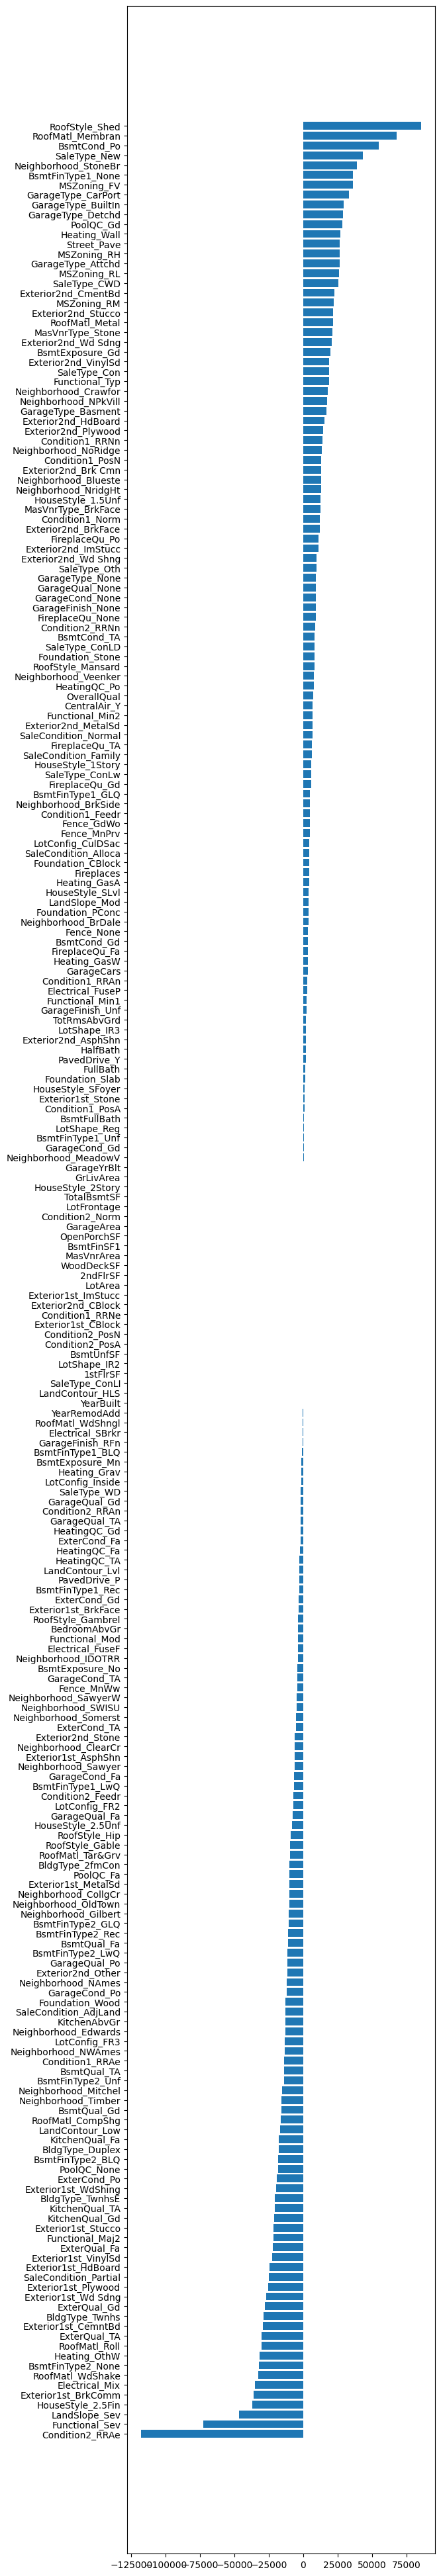

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,50))
plt.barh(feature_importance["Feature"], feature_importance["Coefs"]);

plt.gca().invert_yaxis()

<Axes: ylabel='Count'>

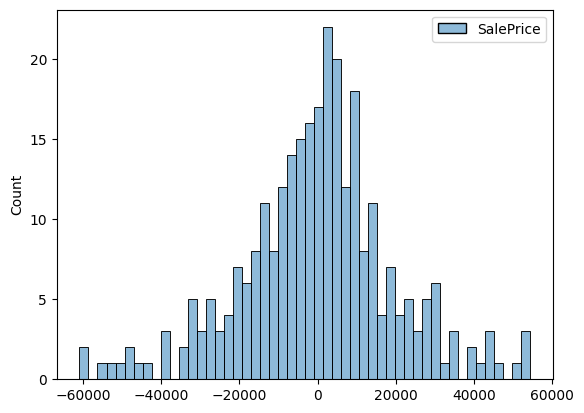

In [65]:
residuals=y_test-tahmin
sns.histplot(residuals, bins=50)

<Axes: xlabel='SalePrice', ylabel='Density'>

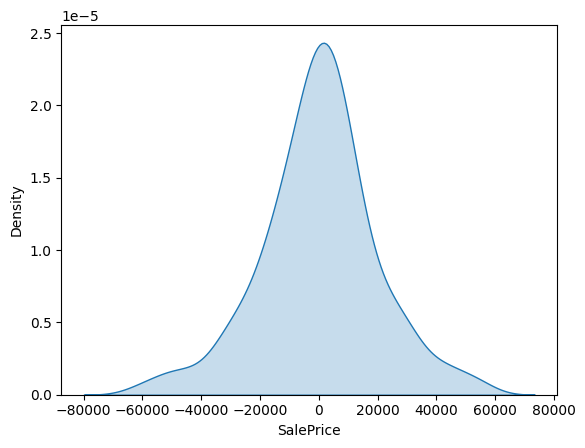

In [66]:
sns.kdeplot(x=residuals["SalePrice"], fill=True)

### Test Verisini Dolduralım

In [67]:
# Önce Yeni bir model eğitelim
g=GradientBoostingRegressor()
model=g.fit(x_train, y_train)

In [68]:
gTahmin=model.predict(x_test)

In [69]:
r2_score(y_test, gTahmin)

0.9300213596663556

In [70]:
mean_squared_error(y_test, gTahmin) ** 0.5

np.float64(18664.7390821803)

In [71]:
X=df_test.drop(["SalePrice"], axis=1)

X=pd.get_dummies(X, drop_first=True)

tahmin=model.predict(X)

In [72]:
tahmin

array([124624.93285329, 159268.515588  , 178685.37938535, ...,
       163923.25343904, 118830.28544297, 235160.75838847])

In [73]:
df2.shape, df_test.shape, tahmin.shape

((1459, 80), (1459, 65), (1459,))

In [74]:
df2["SalePrice"]=tahmin

In [75]:
#df2[["Id", "SalePrice"]].to_csv("akaban1.csv", index=False)

Kaggle skoru: 0.14941

In [76]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Başlık
print("🏠 Ev Fiyat Tahmini Uygulaması 🏠")

# Girdi alanları oluşturma
lot_area = widgets.IntText(description="Arsa Büyüklüğü (ft²):", value=5000)
year_built = widgets.IntText(description="İnşa Yılı:", value=2000)
overall_qual = widgets.IntSlider(description="Genel Kalite:", min=1, max=10, value=5)
gr_liv_area = widgets.IntText(description="Yaşam Alanı (ft²):", value=1500)
garage_cars = widgets.IntText(description="Garaj Kapasitesi:", value=2)

# Tahmin butonu
button = widgets.Button(description="Fiyatı Tahmin Et")
output = widgets.Output()

# Tahmin fonksiyonu
def predict_price(b):
    with output:
        output.clear_output()
        # Basit bir tahmin modeli (örnek)
        predicted_price = lot_area.value * 50 + gr_liv_area.value * 100 + overall_qual.value * 1000 + garage_cars.value * 2000
        print(f"🏠 Tahmini Ev Fiyatı: ${predicted_price:,.2f}")

# Butona tıklama olayını bağlama
button.on_click(predict_price)

# Girdi alanlarını ve butonu gösterme
display(lot_area, year_built, overall_qual, gr_liv_area, garage_cars, button, output)


🏠 Ev Fiyat Tahmini Uygulaması 🏠


IntText(value=5000, description='Arsa Büyüklüğü (ft²):')

IntText(value=2000, description='İnşa Yılı:')

IntSlider(value=5, description='Genel Kalite:', max=10, min=1)

IntText(value=1500, description='Yaşam Alanı (ft²):')

IntText(value=2, description='Garaj Kapasitesi:')

Button(description='Fiyatı Tahmin Et', style=ButtonStyle())

Output()

In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import joblib  # Modeli yüklemek için

# Eğitilmiş modeli yükleyin (model dosyanızın adı ve yolu değişebilir)
# Örnek: model = joblib.load("trained_model.pkl")
# model = joblib.load("/mnt/data/trained_model.pkl")

# Başlık
print("🏠 Ev Fiyat Tahmini Uygulaması 🏠")

# Girdi alanları oluşturma
overall_qual = widgets.IntSlider(description="Genel Kalite:", min=1, max=10, value=5)
gr_liv_area = widgets.IntText(description="Yaşam Alanı (ft²):", value=1500)
garage_cars = widgets.IntText(description="Garaj Kapasitesi:", value=2)
garage_area = widgets.IntText(description="Garaj Alanı (ft²):", value=500)
total_bsmt_sf = widgets.IntText(description="Toplam Bodrum Alanı (ft²):", value=800)
first_flr_sf = widgets.IntText(description="Birinci Kat Alanı (ft²):", value=1200)
full_bath = widgets.IntText(description="Tam Banyo Sayısı:", value=2)
tot_rms_abv_grd = widgets.IntText(description="Toplam Oda Sayısı:", value=7)
year_built = widgets.IntText(description="İnşa Yılı:", value=2000)
year_remod_add = widgets.IntText(description="Yenileme Yılı:", value=2005)
mas_vnr_area = widgets.IntText(description="Taş Kaplama Alanı (ft²):", value=100)
fireplaces = widgets.IntText(description="Şömine Sayısı:", value=1)
bsmt_fin_sf1 = widgets.IntText(description="Bitmiş Bodrum Alanı (ft²):", value=500)
garage_yr_blt = widgets.IntText(description="Garaj İnşa Yılı:", value=2000)
wood_deck_sf = widgets.IntText(description="Ahşap Deck Alanı (ft²):", value=200)
second_flr_sf = widgets.IntText(description="İkinci Kat Alanı (ft²):", value=500)
open_porch_sf = widgets.IntText(description="Açık Sundurma Alanı (ft²):", value=100)
half_bath = widgets.IntText(description="Yarım Banyo Sayısı:", value=1)
lot_area = widgets.IntText(description="Arsa Büyüklüğü (ft²):", value=5000)
bsmt_full_bath = widgets.IntText(description="Bodrum Tam Banyoları:", value=1)
bsmt_unf_sf = widgets.IntText(description="Bitmemiş Bodrum Alanı (ft²):", value=300)
lot_frontage = widgets.IntText(description="Arsa Cephe Uzunluğu (ft):", value=60)
bedroom_abv_gr = widgets.IntText(description="Yatak Odası Sayısı:", value=3)
kitchen_abv_gr = widgets.IntText(description="Mutfak Sayısı:", value=1)

# Tahmin butonu
button = widgets.Button(description="Fiyatı Tahmin Et")
output = widgets.Output()

# Tahmin fonksiyonu
def predict_price(b):
    with output:
        output.clear_output()
        # Kullanıcı girişlerini modelin beklediği formata uygun hale getirme
        input_features = pd.DataFrame([{
            'OverallQual': overall_qual.value,
            'GrLivArea': gr_liv_area.value,
            'GarageCars': garage_cars.value,
            'GarageArea': garage_area.value,
            'TotalBsmtSF': total_bsmt_sf.value,
            '1stFlrSF': first_flr_sf.value,
            'FullBath': full_bath.value,
            'TotRmsAbvGrd': tot_rms_abv_grd.value,
            'YearBuilt': year_built.value,
            'YearRemodAdd': year_remod_add.value,
            'MasVnrArea': mas_vnr_area.value,
            'Fireplaces': fireplaces.value,
            'BsmtFinSF1': bsmt_fin_sf1.value,
            'GarageYrBlt': garage_yr_blt.value,
            'WoodDeckSF': wood_deck_sf.value,
            '2ndFlrSF': second_flr_sf.value,
            'OpenPorchSF': open_porch_sf.value,
            'HalfBath': half_bath.value,
            'LotArea': lot_area.value,
            'BsmtFullBath': bsmt_full_bath.value,
            'BsmtUnfSF': bsmt_unf_sf.value,
            'LotFrontage': lot_frontage.value,
            'BedroomAbvGr': bedroom_abv_gr.value,
            'KitchenAbvGr': kitchen_abv_gr.value
        }])
        
        # Model ile tahmin yapma (örnek bir formül ile tahmin yapılıyor)
        predicted_price = (
            gr_liv_area.value * 100 + 
            garage_area.value * 50 + 
            total_bsmt_sf.value * 80 + 
            overall_qual.value * 1000
        )
        
        print(f"🏠 Tahmini Ev Fiyatı: ${predicted_price:,.2f}")

# Butona tıklama olayını bağlama
button.on_click(predict_price)

# Girdi alanlarını ve butonu gösterme
display(overall_qual, gr_liv_area, garage_cars, garage_area, total_bsmt_sf, first_flr_sf,
        full_bath, tot_rms_abv_grd, year_built, year_remod_add, mas_vnr_area, fireplaces,
        bsmt_fin_sf1, garage_yr_blt, wood_deck_sf, second_flr_sf, open_porch_sf, half_bath,
        lot_area, bsmt_full_bath, bsmt_unf_sf, lot_frontage, bedroom_abv_gr, kitchen_abv_gr,
        button, output)


🏠 Ev Fiyat Tahmini Uygulaması 🏠


IntSlider(value=5, description='Genel Kalite:', max=10, min=1)

IntText(value=1500, description='Yaşam Alanı (ft²):')

IntText(value=2, description='Garaj Kapasitesi:')

IntText(value=500, description='Garaj Alanı (ft²):')

IntText(value=800, description='Toplam Bodrum Alanı (ft²):')

IntText(value=1200, description='Birinci Kat Alanı (ft²):')

IntText(value=2, description='Tam Banyo Sayısı:')

IntText(value=7, description='Toplam Oda Sayısı:')

IntText(value=2000, description='İnşa Yılı:')

IntText(value=2005, description='Yenileme Yılı:')

IntText(value=100, description='Taş Kaplama Alanı (ft²):')

IntText(value=1, description='Şömine Sayısı:')

IntText(value=500, description='Bitmiş Bodrum Alanı (ft²):')

IntText(value=2000, description='Garaj İnşa Yılı:')

IntText(value=200, description='Ahşap Deck Alanı (ft²):')

IntText(value=500, description='İkinci Kat Alanı (ft²):')

IntText(value=100, description='Açık Sundurma Alanı (ft²):')

IntText(value=1, description='Yarım Banyo Sayısı:')

IntText(value=5000, description='Arsa Büyüklüğü (ft²):')

IntText(value=1, description='Bodrum Tam Banyoları:')

IntText(value=300, description='Bitmemiş Bodrum Alanı (ft²):')

IntText(value=60, description='Arsa Cephe Uzunluğu (ft):')

IntText(value=3, description='Yatak Odası Sayısı:')

IntText(value=1, description='Mutfak Sayısı:')

Button(description='Fiyatı Tahmin Et', style=ButtonStyle())

Output()